# DBSCan clustering to identify outliers

unsupervised

In [4]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [5]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### DBSCan clustering to identify outliers
#### Train your model and identify outliers

In [7]:
# with this example, we're going to use the same data that we used for the rest of this chapter. So we're going to copy and 
# paste in the code. 
address = '../../data/iris.data.csv'
df = pd.read_csv(address, header=None, sep=',')

df.columns=['Sepal Length','Sepal Width','Petal Length','Petal Width', 'Species']

data = df.iloc[:,0:4].values
target = df.iloc[:,4].values

df[:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
model = DBSCAN(eps=0.8,  min_samples=19).fit(data)

params = model.get_params()

print("Model Parameters:")
for param_name, param_value in params.items():
    print(f"{param_name}: {param_value}")                                        

Model Parameters:
algorithm: auto
eps: 0.8
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 19
n_jobs: None
p: None


#### Visualize your results

In [11]:
outliers_df = pd.DataFrame(data)

print(Counter(model.labels_))

print(outliers_df[model.labels_ ==-1])

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

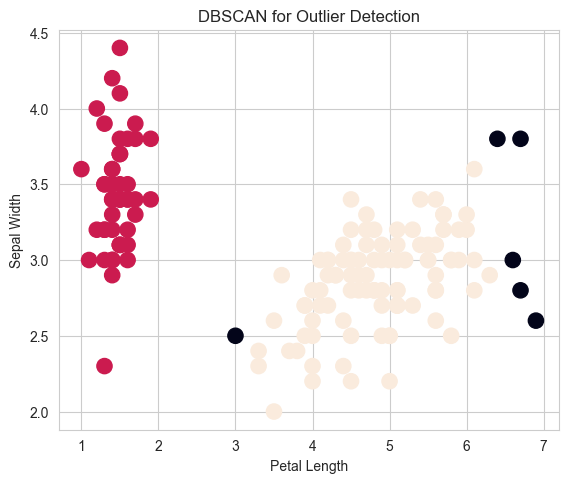

In [12]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

colors = model.labels_

ax.scatter(data[:,2], data[:,1], c=colors, s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for Outlier Detection')